In [682]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [683]:
deliveries_df = pd.read_csv('deliveries.csv')
matches_df = pd.read_csv('matches.csv')

In [684]:
deliveries_df.head(3)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN


In [685]:
deliveries_df.isna().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64

In [686]:
deliveries_df.drop(['dismissal_kind','fielder'],axis=1,inplace=True)

In [687]:
deliveries_df.isna().sum().sum()

170244

In [688]:
matches_df.head(3)

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN


In [689]:
matches_df.isna().sum()

id                   0
Season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [690]:
matches_df.drop(['umpire3'],axis=1,inplace=True)

In [691]:
matches_df[matches_df.isna().sum()[matches_df.isna().sum()>0].index.tolist()]

,city,winner,player_of_match,umpire1,umpire2
0,Hyderabad,Sunrisers Hyderabad,Yuvraj Singh,AY Dandekar,NJ Llong
1,Pune,Rising Pune Supergiant,SPD Smith,A Nand Kishore,S Ravi
2,Rajkot,Kolkata Knight Riders,CA Lynn,Nitin Menon,CK Nandan
3,Indore,Kings XI Punjab,GJ Maxwell,AK Chaudhary,C Shamshuddin
4,Bangalore,Royal Challengers Bangalore,KM Jadhav,NaN,NaN
...,...,...,...,...,...
751,Mumbai,Mumbai Indians,HH Pandya,Nanda Kishore,O Nandan
752,Chennai,Mumbai Indians,AS Yadav,Nigel Llong,Nitin Menon
753,Visakhapatnam,Delhi Capitals,RR Pant,NaN,NaN
754,Visakhapatnam,Chennai Super Kings,F du Plessis,Sundaram Ravi,Bruce Oxenford


In [692]:
'''
Points to be noted:
> The winner is Nan only for those matches when there is draw
> The Player of the match  is Nan only for those matches when there is draw
> City Nan values is Dubai
> Umpire 1 and Umpire 2 are unknown for some matches
'''
matches_df[matches_df.isna().any(axis=1)]

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN
300,301,IPL-2011,Delhi,21-05-2011,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,no result,0,NaN,0,0,NaN,Feroz Shah Kotla,SS Hazare,RJ Tucker
461,462,IPL-2014,NaN,19-04-2014,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,7,PA Patel,Dubai International Cricket Stadium,Aleem Dar,AK Chaudhary
462,463,IPL-2014,NaN,19-04-2014,Kolkata Knight Riders,Delhi Daredevils,Kolkata Knight Riders,bat,normal,0,Delhi Daredevils,0,4,JP Duminy,Dubai International Cricket Stadium,Aleem Dar,VA Kulkarni
466,467,IPL-2014,NaN,23-04-2014,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,normal,0,Chennai Super Kings,7,0,RA Jadeja,Dubai International Cricket Stadium,HDPK Dharmasena,RK Illingworth
468,469,IPL-2014,NaN,25-04-2014,Sunrisers Hyderabad,Delhi Daredevils,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,4,0,AJ Finch,Dubai International Cricket Stadium,M Erasmus,S Ravi
469,470,IPL-2014,NaN,25-04-2014,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Chennai Super Kings,0,7,MM Sharma,Dubai International Cricket Stadium,BF Bowden,M Erasmus
474,475,IPL-2014,NaN,28-04-2014,Royal Challengers Bangalore,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,5,Sandeep Sharma,Dubai International Cricket Stadium,BF Bowden,S Ravi
476,477,IPL-2014,NaN,30-04-2014,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Sunrisers Hyderabad,15,0,B Kumar,Dubai International Cricket Stadium,HDPK Dharmasena,M Erasmus
545,546,IPL-2015,Bangalore,29-04-2015,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,JD Cloete,PG Pathak


In [693]:
# Filling Nans with 'Dubai' in 'city' column
matches_df['city'].fillna(value='Dubai',inplace=True)

In [694]:
# Filling Nans with 'No-one' in 'player_of_match' column
matches_df['player_of_match'].fillna(value='No-one',inplace=True)

In [695]:
# Filling Nans with 'Draw' in 'winner' column
matches_df['winner'].fillna(value='Draw',inplace=True)

In [696]:
# Filling Nans of 'umpire1' and 'umpire2' with 'ffill' method
matches_df['umpire1'].fillna(value='Aleem Dar',inplace=True)
matches_df['umpire2'].fillna(value='Aleem Dar',inplace=True)

In [697]:
matches_df.isna().sum().sum()

0

In [698]:
# List of teams who played frequently in almost all seasons
teams = [
    'Royal Challengers Bangalore', 'Kolkata Knight Riders', 'Kings XI Punjab', 'Sunrisers Hyderabad',
    'Mumbai Indians', 'Rajasthan Royals', 'Chennai Super Kings','Delhi Capitals'    
]

In [699]:
matches_df['team1'] = matches_df['team1'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
matches_df['team1'] = matches_df['team1'].str.replace('Delhi Daredevils','Delhi Capitals')
matches_df['team2'] = matches_df['team2'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
matches_df['team2'] = matches_df['team2'].str.replace('Delhi Daredevils','Delhi Capitals')
matches_df['winner'] = matches_df['winner'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
matches_df['winner'] = matches_df['winner'].str.replace('Delhi Daredevils','Delhi Capitals')

deliveries_df['batting_team'] = deliveries_df['batting_team'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
deliveries_df['batting_team'] = deliveries_df['batting_team'].str.replace('Delhi Daredevils','Delhi Capitals')
deliveries_df['bowling_team'] = deliveries_df['bowling_team'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
deliveries_df['bowling_team'] = deliveries_df['bowling_team'].str.replace('Delhi Daredevils','Delhi Capitals')

In [700]:
# discarding the matches for the non-frequent teams
x = matches_df['team1'].isin(teams) & matches_df['team2'].isin(teams)
matches_df = matches_df.loc[x[x].index]

In [701]:
x = deliveries_df['match_id'].isin(matches_df['id'].values)
deliveries_df = deliveries_df.loc[x[x].index]

In [702]:
deliveries_df['batting_team'].unique()

array(['Sunrisers Hyderabad', 'Royal Challengers Bangalore',
       'Delhi Capitals', 'Kolkata Knight Riders', 'Mumbai Indians',
       'Kings XI Punjab', 'Chennai Super Kings', 'Rajasthan Royals'],
      dtype=object)

In [703]:
# Evaluating the cumulative runs by ball for each inning and match
deliveries_df['runs_cumsum']=deliveries_df.groupby(['match_id','inning']).cumsum()['total_runs'].values.tolist()

In [704]:
# For each over there is 6 balls, therefore limiting the official ball count per over to 6
deliveries_df.loc[deliveries_df['ball'][deliveries_df['ball']>6].index.tolist(),'ball']  = 6

In [705]:
# Evaluating the Current run rate
'''
Current Run Rate = (Total Runs) / (Number 0f Overs + (Number of Balls/6))
'''
deliveries_df['curr_run_rate'] =  deliveries_df['runs_cumsum']/((deliveries_df['over']-1)+deliveries_df['ball']/6)

In [706]:
# total no. of balls Delivered
deliveries_df['total_balls']=(deliveries_df['over']-1)*6 + deliveries_df['ball']

In [707]:
# Total no. of balls left
deliveries_df['balls_left'] = 120 - deliveries_df['total_balls']

In [708]:
# Working out for wickets fall
not_out_ind = deliveries_df[deliveries_df['player_dismissed'].isna()].index.tolist()
out_ind = deliveries_df.loc[~deliveries_df['player_dismissed'].index.isin(not_out_ind),'player_dismissed'].index.tolist()
# for the not out ball index we give it 0 value
deliveries_df.loc[not_out_ind,'wicket_fall'] = 0
# for the out ball index we give it 1 value
deliveries_df.loc[out_ind,'wicket_fall'] = 1
# finally we evaluate the total wickets fell down till ball for eavh innings
deliveries_df['wicket_fall'] = deliveries_df.groupby(['match_id','inning']).cumsum()['wicket_fall'].values.tolist()

In [709]:
deliveries_df.loc[not_out_ind,'player_dismissed'] = 'Not Out'

In [710]:
deliveries_df.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'runs_cumsum', 'curr_run_rate', 'total_balls', 'balls_left',
       'wicket_fall'],
      dtype='object')

In [711]:
x = deliveries_df['player_dismissed'] == 'Not Out'
deliveries_df.loc[x[x].index,'is_wicket'] = 0
x = deliveries_df['player_dismissed'] != 'Not Out'
deliveries_df.loc[x[x].index,'is_wicket'] = 1

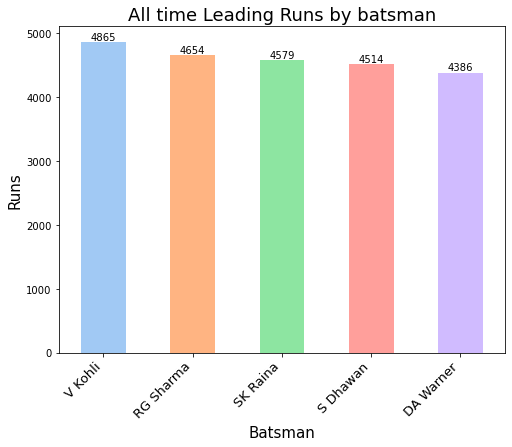

In [712]:
# All time leading runs scorer 
plt.figure(figsize=(8,6))
x = pd.Series(deliveries_df.groupby('batsman').sum()['total_runs']).nlargest(5)
labels = x.values
colors = sns.color_palette('pastel')
ax = x.plot(kind='bar',color=colors)
plt.title('All time Leading Runs by batsman',fontsize=18)
plt.ylabel('Runs',fontsize=15)
plt.xlabel('Batsman',fontsize=15)
plt.xticks(rotation=45,ha='right',fontsize=13)
plt.bar_label(ax.containers[0],labels=labels)
plt.show()

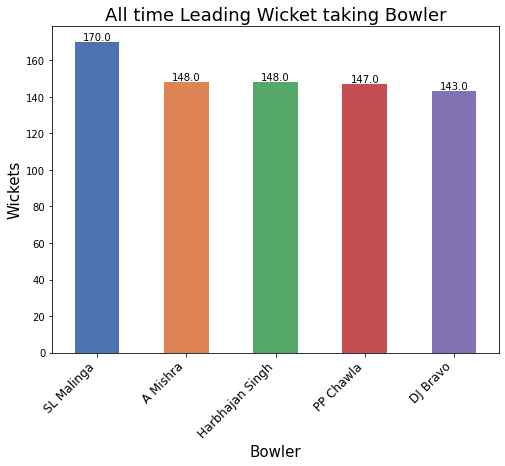

In [713]:
# All time leading wickets taker
plt.figure(figsize=(8,6))
x = pd.Series(deliveries_df.groupby('bowler').sum()['is_wicket']).nlargest(5)
labels = x.values
colors = sns.color_palette('deep')
ax = x.plot(kind='bar',color=colors)
plt.title('All time Leading Wicket taking Bowler',fontsize=18)
plt.ylabel('Wickets',fontsize=15)
plt.xlabel('Bowler',fontsize=15)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.bar_label(ax.containers[0],labels=labels)
plt.show()

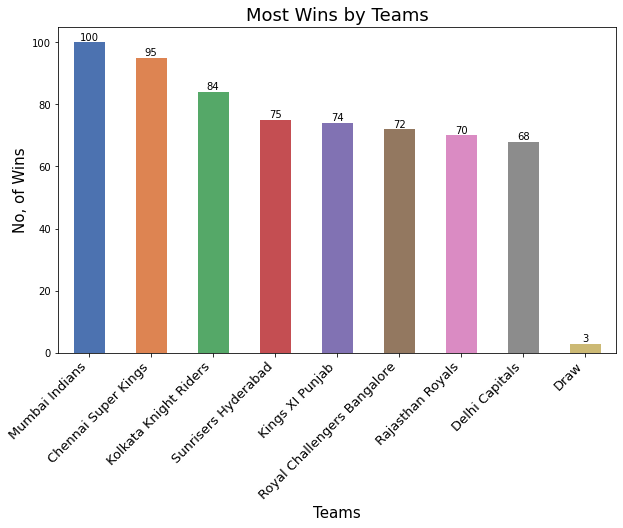

In [714]:
x = matches_df['winner'].value_counts()
labels= x.values
colors = sns.color_palette(palette='deep')
plt.figure(figsize=(10,6))
ax = x.plot(kind='bar',color=colors)
plt.title('Most Wins by Teams',fontsize=18)
plt.xlabel('Teams',fontsize=15)
plt.ylabel('No, of Wins',fontsize=15)
plt.xticks(rotation=45,ha='right',fontsize=13)
plt.bar_label(ax.containers[0],labels=labels)
plt.show()

In [715]:
# Top 'win by runs'
matches_df[['winner','win_by_runs']].nlargest(columns=['win_by_runs'],n=5)

,winner,win_by_runs
43,Mumbai Indians,146
59,Kolkata Knight Riders,140
556,Royal Challengers Bangalore,138
706,Sunrisers Hyderabad,118
295,Kings XI Punjab,111


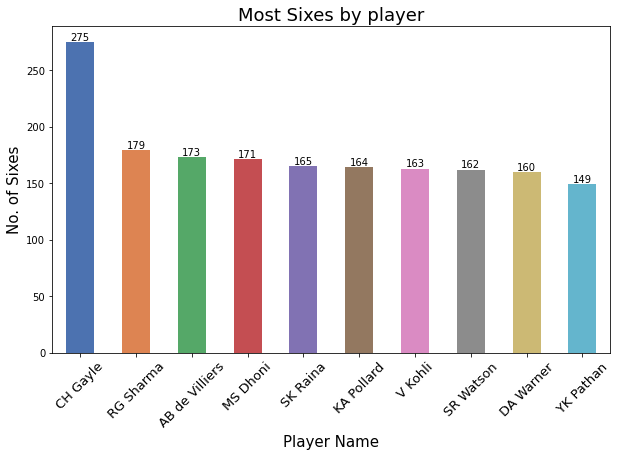

In [716]:
# Player hitting Most Sixes
x = deliveries_df['total_runs'] == 6
x = pd.Series(deliveries_df.loc[x[x].index,'batsman'].value_counts()).nlargest(10)
labels = x.values
colors = sns.color_palette(palette='deep')
plt.figure(figsize = (10,6))
ax = x.plot(kind='bar',color = colors)
plt.title('Most Sixes by player',fontsize=18)
plt.xlabel('Player Name',fontsize=15)
plt.ylabel('No. of Sixes',fontsize=15)
plt.bar_label(ax.containers[0],labels=labels)
plt.xticks(rotation=45,fontsize=13)
plt.show()

#### Now, We prepare a DataFrame to feed in the model fro predictions

In [717]:
final_df = deliveries_df[['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball','total_runs', 'runs_cumsum', 'curr_run_rate',
       'total_balls', 'balls_left', 'wicket_fall']]

In [718]:
# Evaluating the target given by the batting team
x = deliveries_df.groupby(['match_id','inning']).sum().reset_index()
target = x[x['inning']==1][['match_id','total_runs']]
final_df = pd.merge(left=final_df,right=target,on='match_id')

In [719]:
'''
Since, win predictions comes into play only in the second inning
Therefore, we shall consider 2nd innings from now onwards
'''
final_df = final_df[final_df['inning']==2]

In [720]:
# Evaluating the run left and the wickets left
final_df['runs_left'] = final_df['total_runs_y'] - final_df['runs_cumsum']
final_df['wickets_left'] = 10 - final_df['wicket_fall']

In [721]:
final_df = final_df.reset_index().drop('index',axis=1)

In [722]:
'''
For a team scoring more than required the Reqd. runs may become Negative
> To fix it, we adjust the minimum value of runs left to zero
'''
x = final_df['runs_left']<=0
final_df.loc[x[x].index.tolist(),['runs_left']] = 0

In [723]:
# Evaluating the Required Run Rate (RRR)
final_df['Req_run_rate'] = (final_df['runs_left'] * 6)/(final_df['balls_left'])
'''
Since, for zero runs reqd; balls left can be zero therefore the RRR might become Nans
> To fix this issue we fill the Nans of RRR with the previous observation
'''

final_df.isna().sum()[final_df.isna().sum()>0]

Req_run_rate    39
dtype: int64

In [724]:
# Filling the Nans created above
final_df['Req_run_rate'].fillna(method='ffill',inplace=True)

In [725]:
x = final_df['Req_run_rate'] == np.inf
x[x].index

Int64Index([  246,   921,  1042,  1289,  1411,  1633,  1634,  1916,  2087,
             2855,
            ...
            69305, 70141, 70368, 71317, 71790, 71791, 71911, 72038, 72278,
            73063],
           dtype='int64', length=281)

In [726]:
x = final_df['Req_run_rate'] == np.inf
ind = x[x].index.tolist()
for i in ind: 
    final_df.loc[i,'Req_run_rate'] = final_df.loc[i - 1,'Req_run_rate']

In [727]:
x = final_df['Req_run_rate'] == np.inf
x[x].index

Int64Index([], dtype='int64')

In [728]:
# Renaming some columns
final_df.rename(columns={'total_runs_x':'run_scored','total_runs_y':'target'},inplace=True)

dl_matches = matches_df[matches_df['dl_applied']==1]['id'].values.tolist()
dl_matches

final_df.loc[final_df['match_id'].isin(dl_matches)[final_df['match_id'].isin(dl_matches)].index.tolist()]

In [729]:
'''
Now, finding our target variable i.e the winner of the match
'''
winner = matches_df[['id','winner']]
final_df = pd.merge(left=final_df,right=winner,right_on='id',left_on='match_id')
final_df.drop('id',axis=1,inplace=True)

In [730]:
# If the batting wins in second innings, we label it '1'
x = final_df['batting_team'] == final_df['winner']
final_df.loc[x[x].index.tolist(),'winner'] = 1
# If bowling team wins in second inning, we label it '0'
x = final_df['bowling_team'] == final_df['winner']
final_df.loc[x[x].index.tolist(),'winner'] = 0
# If there is a draw ,we label it '2'
x = final_df['winner'] == str('Draw')
final_df.loc[x[x].index.tolist(),'winner'] = 2

In [731]:
final_df.head(3)

,match_id,inning,batting_team,bowling_team,over,ball,run_scored,runs_cumsum,curr_run_rate,total_balls,balls_left,wicket_fall,target,runs_left,wickets_left,Req_run_rate,winner
0,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,1,1,6.0,1,119,0.0,207,206,10.0,10.386555,0
1,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,0,1,3.0,2,118,0.0,207,206,10.0,10.474576,0
2,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,0,1,2.0,3,117,0.0,207,206,10.0,10.564103,0


In [732]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
final_df['batting_team'] = le.fit_transform(final_df['batting_team'])
final_df['bowling_team'] = le.fit_transform(final_df['bowling_team'])

In [733]:
Y = final_df['winner']
X = final_df[[i for i in final_df.columns if i != 'winner']]

In [748]:
X.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'run_scored', 'runs_cumsum', 'curr_run_rate', 'total_balls',
       'balls_left', 'wicket_fall', 'target', 'runs_left', 'wickets_left',
       'Req_run_rate'],
      dtype='object')

In [765]:
X = X[['batting_team', 'bowling_team','runs_cumsum',
       'balls_left', 'wicket_fall', 'target', 'runs_left']]

In [774]:
teams.sort()

In [775]:
teams

['Chennai Super Kings',
 'Delhi Capitals',
 'Kings XI Punjab',
 'Kolkata Knight Riders',
 'Mumbai Indians',
 'Rajasthan Royals',
 'Royal Challengers Bangalore',
 'Sunrisers Hyderabad']

In [766]:
Y = Y.astype(int)
Y.info()

<class 'pandas.core.series.Series'>
Int64Index: 73304 entries, 0 to 73303
Series name: winner
Non-Null Count  Dtype
--------------  -----
73304 non-null  int32
dtypes: int32(1)
memory usage: 2.9 MB


In [767]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error,accuracy_score

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=0)
rf = RandomForestClassifier(random_state=0)
rf.fit(X_train,Y_train)
Y_predict = rf.predict(X_test)

In [768]:
np.sqrt(mean_squared_error(Y_test,Y_predict))

0.077474635060938

In [769]:
rf.score(X_test,Y_test)

0.9939976809221744

In [800]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,Y_predict)

0.9939976809221744

In [795]:
test = [[1,5,112,30,2,171,59]]
rf.predict_proba(test)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([[0.48, 0.52, 0.  ]])

In [776]:
171-112

59